In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
meesho=pd.read_csv(r"C:\Users\ak524\OneDrive\Desktop\Messo_Data_Analysis\meesho ForwardReports.csv")

In [3]:
meesho.head()

,order_date,sub_order_num,order_status,state,pin,gst_amount,meesho_price,shipping_charges_total,price
0,2022-08-30,381809810413_1,Shipped,Jammu & Kashmir,180006,66.68,1400,121,1521
1,2022-08-10,940712900368_1,rto,Uttar Pradesh,208014,69.58,1461,114,1575
2,2022-08-03,322259568161_1,Delivered,Telangana,509001,64.30,1350,108,1440
3,2022-08-27,475133679575_1,Cancelled,Jammu & Kashmir,182101,98.96,2078,0,2078
4,2022-08-04,493966375185_1,rto,Odisha,760001,64.30,1350,108,1458


In [4]:
meesho.tail()

,order_date,sub_order_num,order_status,state,pin,gst_amount,meesho_price,shipping_charges_total,price
133,2022-08-30,271046524562_1,Shipped,Delhi,110009,66.68,1400,110,1510
134,2022-08-15,346130315989_1,Return,Andhra Pradesh,532005,64.30,1350,114,1464
135,2022-08-11,312073496064_1,rto,Telangana,500052,66.68,1400,110,1525
136,2022-08-02,916538974169_1,rto,Assam,782435,88.62,1861,0,1861
137,2022-08-07,436163379734_1,Delivered,MAHARASHTRA,421204,51.14,1074,0,1052


In [5]:
meesho.dtypes

order_date                 object
sub_order_num              object
order_status               object
state                      object
pin                         int64
gst_amount                float64
meesho_price                int64
shipping_charges_total      int64
price                       int64
dtype: object

In [17]:
Rows,Columns=meesho.shape
print("Rows :",Rows),print("Columns:",Columns)

Rows : 138
Columns: 9


(None, None)

In [6]:
meesho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_date              138 non-null    object 
 1   sub_order_num           138 non-null    object 
 2   order_status            138 non-null    object 
 3   state                   138 non-null    object 
 4   pin                     138 non-null    int64  
 5   gst_amount              138 non-null    float64
 6   meesho_price            138 non-null    int64  
 7   shipping_charges_total  138 non-null    int64  
 8   price                   138 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 9.8+ KB


# Summary statistics for numerical columns

In [18]:
meesho.describe()

,pin,gst_amount,meesho_price,shipping_charges_total,price
count,138.000000,138.000000,138.000000,138.000000,138.000000
mean,477676.594203,62.015507,1292.289855,69.673913,1358.572464
std,207795.595378,20.974350,440.464241,54.120056,460.108760
min,110007.000000,23.480000,493.000000,0.000000,480.000000
25%,316501.250000,62.440000,1302.750000,0.000000,1414.000000
50%,497845.500000,64.300000,1350.000000,108.000000,1464.000000
75%,670991.750000,71.405000,1491.500000,114.000000,1519.750000
max,848504.000000,116.960000,2456.000000,148.000000,2456.000000


In [8]:
meesho.isnull().sum()

order_date                0
sub_order_num             0
order_status              0
state                     0
pin                       0
gst_amount                0
meesho_price              0
shipping_charges_total    0
price                     0
dtype: int64

In [9]:
meesho.columns

Index(['order_date', 'sub_order_num', 'order_status', 'state', 'pin',
       'gst_amount', 'meesho_price', 'shipping_charges_total', 'price'],
      dtype='object')

# Convert 'order_date' column to datetime format

In [43]:
meesho['order_date'] = pd.to_datetime(meesho['order_date'])

# Extract year, month, day, and day of week from 'order_date'

In [56]:
meesho['year'] = meesho['order_date'].dt.year
meesho['month'] = meesho['order_date'].dt.month
meesho['day'] = meesho['order_date'].dt.day
meesho['day_of_week'] = meesho['order_date'].dt.dayofweek


# Count orders by year, month, and day of week

In [57]:
orders_by_year = meesho['year'].value_counts().sort_index()
orders_by_month = meesho['month'].value_counts().sort_index()
orders_by_day = meesho['day'].value_counts().sort_index()
orders_by_day_of_week = meesho['day_of_week'].value_counts().sort_index()

# Combine all insights into one DataFrame

In [62]:
print("Orders by Year:")
pd.DataFrame(orders_by_year)

Orders by Year:


,count
year,
2022,138


In [63]:
print("Orders by Month:")
pd.DataFrame(orders_by_month)

Orders by Month:


,count
month,
7,6
8,132


In [64]:
print("Orders by Day:")
pd.DataFrame(orders_by_day)

Orders by Day:


,count
day,
1,1
2,5
3,2
4,5
5,2
6,3
7,4
8,4
9,5


In [65]:
print("Orders by Day of Week:")
pd.DataFrame(orders_by_day_of_week)

Orders by Day of Week:


,count
day_of_week,
0,24
1,24
2,10
3,25
4,16
5,20
6,19


# Check for unique sub_order_num count

In [48]:
unique_sub_orders = meesho['sub_order_num'].nunique()
print("Unique Sub Order Count:", unique_sub_orders)

Unique Sub Order Count: 138


# Check for the most frequent sub_order_num

In [66]:
most_frequent_sub_order = meesho['sub_order_num'].value_counts().idxmax()
print("Most Frequent Sub Order Number:", most_frequent_sub_order)

Most Frequent Sub Order Number: 381809810413_1


# Proportion of each order status

In [71]:
order_status_proportion = meesho['order_status'].value_counts(normalize=True)
print("Proportion of Order Status:")
formatted_order_status_proportion = order_status_proportion.apply(lambda x: '{:.2f}'.format(x))
pd.DataFrame(formatted_order_status_proportion)

Proportion of Order Status:


,proportion
order_status,
Delivered,0.36
Return,0.25
Shipped,0.19
rto,0.16
Cancelled,0.03
Exchange,0.01


# Most frequent PIN codes

In [72]:
most_frequent_pins = meesho['pin'].value_counts().head(10)
print("Most Frequent PIN Codes:")
pd.DataFrame(most_frequent_pins)


Most Frequent PIN Codes:


,count
pin,
395010,3
382415,3
452002,2
400095,2
143101,2
711227,2
465674,2
560100,1
712235,1


# Median Meesho price

In [73]:
median_meesho_price = meesho['meesho_price'].median()
print("Median Meesho Price:", median_meesho_price)

Median Meesho Price: 1350.0


# Average revenue per order

In [74]:
avg_revenue_per_order = meesho['price'].mean()
print("Average Revenue per Order:", avg_revenue_per_order)

Average Revenue per Order: 1358.572463768116


# Summary statistics for Meesho prices

In [50]:
meesho_price_stats = meesho['meesho_price'].describe()
print("Meesho Price Summary Statistics:")
pd.DataFrame(meesho_price_stats)


Meesho Price Summary Statistics:


,meesho_price
count,138.000000
mean,1292.289855
std,440.464241
min,493.000000
25%,1302.750000
50%,1350.000000
75%,1491.500000
max,2456.000000


# Total revenue

In [54]:
total_revenue = meesho['price'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 187483


# Count of unique values in each column

In [19]:
unique=meesho.nunique()
print(unique)

order_date                 33
sub_order_num             138
order_status                6
state                      32
pin                       129
gst_amount                 37
meesho_price               37
shipping_charges_total     20
price                      68
dtype: int64


# Analysis of order status

In [20]:
order_status_counts = meesho['order_status'].value_counts()
print(order_status_counts)

order_status
Delivered    50
Return       34
Shipped      26
rto          22
Cancelled     4
Exchange      2
Name: count, dtype: int64


# Pie chart for order status distribution

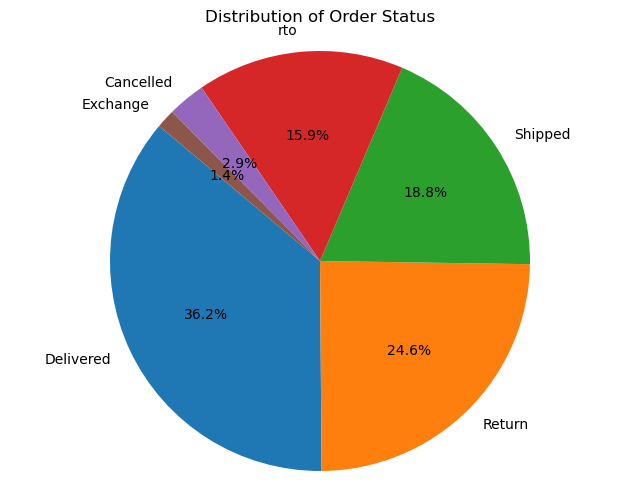

In [52]:
plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Order Status')
plt.ylabel('')
plt.axis('equal')
plt.show()

# Analysis of state-wise orders

In [22]:
statewise_orders = meesho.groupby('state').size().sort_values(ascending=False)
print(statewise_orders)

state
Uttar Pradesh          11
Tamil Nadu             10
West Bengal             9
Telangana               9
Andhra Pradesh          8
Madhya Pradesh          8
Gujarat                 8
Kerala                  8
Odisha                  7
Jammu & Kashmir         6
Maharashtra             6
Rajasthan               5
Punjab                  5
Assam                   5
Karnataka               5
Delhi                   4
Uttarakhand             3
Bihar                   3
Chhattisgarh            3
Himachal Pradesh        2
Others                  2
Mumbai                  1
State Bank Of India     1
Arunachal Pradesh       1
Chandigarh              1
Up                      1
Goa                     1
MAHARASHTRA             1
Haryana                 1
odisha                  1
punjab                  1
seoni                   1
dtype: int64


# Plotting the bar plot

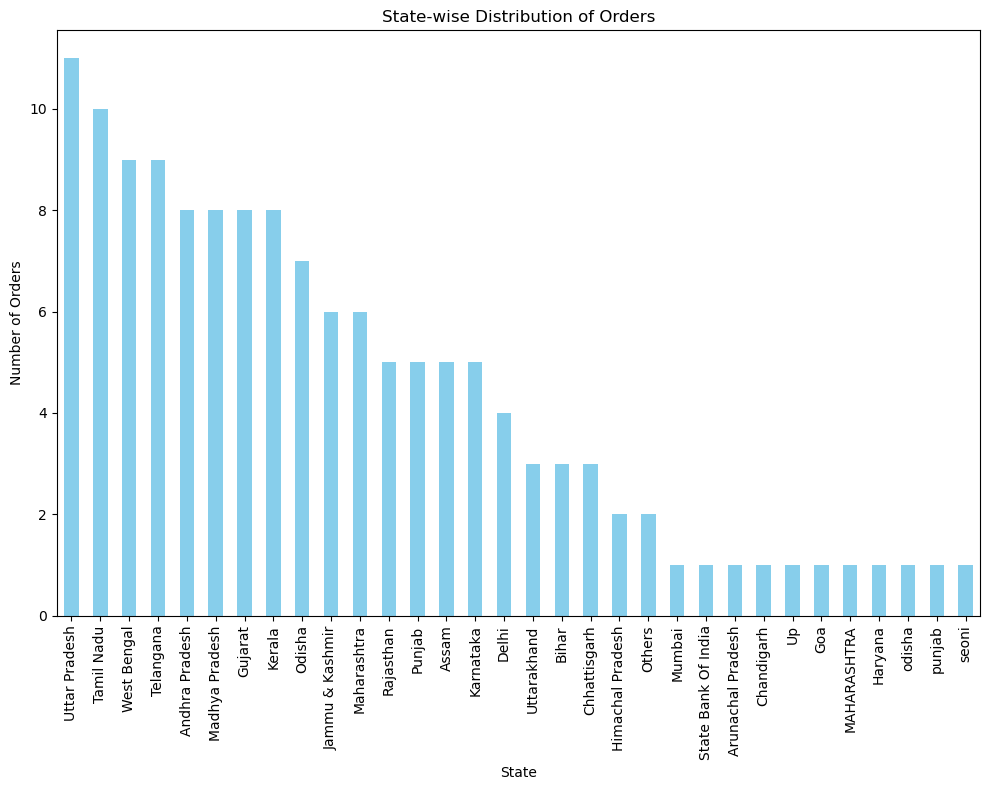

In [26]:
plt.figure(figsize=(10, 8))
statewise_orders.plot(kind='bar', color='skyblue')
plt.title('State-wise Distribution of Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Analysis of GST amount

In [27]:
print(meesho['gst_amount'].sum())

8558.14


# Analysis of shipping charges



In [30]:
mean_shipping_charges = meesho['shipping_charges_total'].mean()
print('{:.2f}'.format(mean_shipping_charges))

69.67


# Average GST per order

In [33]:
average_gst_per_order = meesho['gst_amount'].sum() / len(meesho)
print("Average GST per order:", average_gst_per_order)

Average GST per order: 62.01550724637681


# Percentage of revenue from GST

In [34]:
total_revenue = meesho['price'].sum()
percentage_of_revenue_from_gst = (meesho['gst_amount'].sum() / total_revenue) * 100
print("Percentage of revenue from GST: {:.2f}%".format(percentage_of_revenue_from_gst))

Percentage of revenue from GST: 4.56%


# Analysis of Shipping Charges:

In [41]:
shiping_charges=meesho["shipping_charges_total"].value_counts()
pd.DataFrame(shiping_charges)

,count
shipping_charges_total,
0,50
114,35
110,14
81,10
108,8
148,3
105,2
79,2
140,2


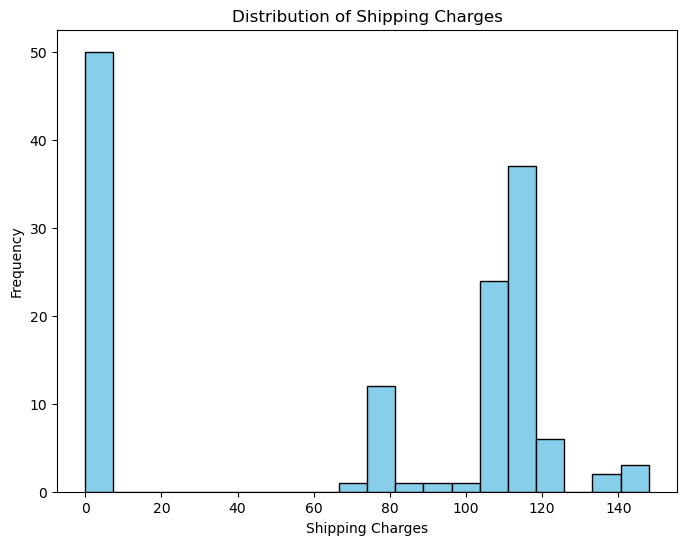

In [35]:
plt.figure(figsize=(8, 6))
plt.hist(meesho['shipping_charges_total'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Shipping Charges')
plt.xlabel('Shipping Charges')
plt.ylabel('Frequency')
plt.show()

In [75]:
meesho.head(2)

,order_date,sub_order_num,order_status,state,pin,gst_amount,meesho_price,shipping_charges_total,price,year,month,day,day_of_week
0,2022-08-30,381809810413_1,Shipped,Jammu & Kashmir,180006,66.68,1400,121,1521,2022,8,30,1
1,2022-08-10,940712900368_1,rto,Uttar Pradesh,208014,69.58,1461,114,1575,2022,8,10,2
